## Task 1 : State Vector Simulation of Quantum Circuits

 Implemented a state vectorstatevector simulator for quantum circuits from scratch. The goal was to demystify how to simulate a quantum computer and to demonstrate your familiarity with quantum circuits.

### Part 1

#### Naive simulation using matrix multiplication

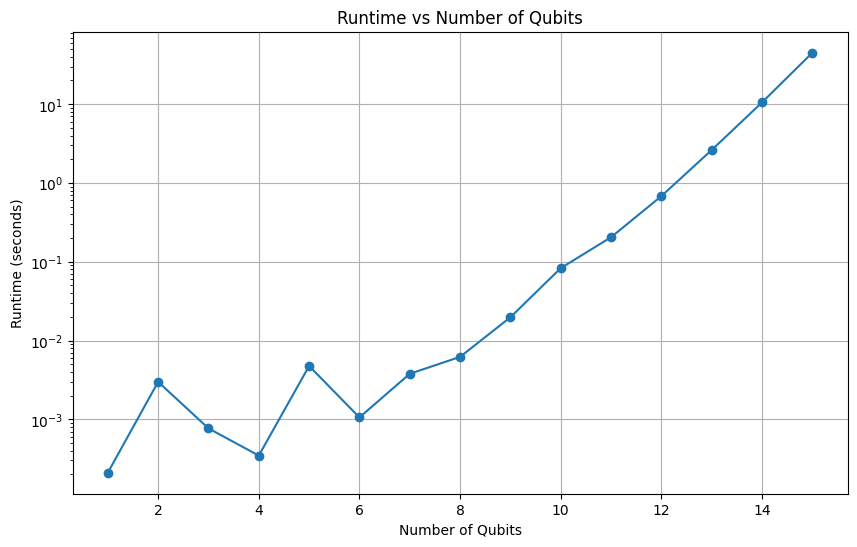

Maximum number of qubits simulated: 15
Runtime for 15 qubits: 45.0400 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def create_CNOT(control, target, n_qubits):
    if control >= n_qubits or target >= n_qubits:
        raise ValueError("Control and target qubits must be less than the total number of qubits")
    if control == target:
        raise ValueError("Control and target qubits must be different")

    mat = np.eye(2**n_qubits)
    for i in range(2**n_qubits):
        if (i & (1 << control)) != 0:
            mat[i, i ^ (1 << target)] = 1
            mat[i, i] = 0
    return mat

def apply_gate(state, gate, target_qubits, n_qubits):
    if isinstance(gate, np.ndarray) and gate.shape == (2**n_qubits, 2**n_qubits):
        return np.dot(gate, state)
    else:
        full_gate = 1
        for i in range(n_qubits):
            if i in target_qubits:
                full_gate = np.kron(full_gate, gate)
            else:
                full_gate = np.kron(full_gate, I)
        return np.dot(full_gate, state)

def run_circuit(n_qubits):
    state = np.zeros(2**n_qubits)
    state[0] = 1  # Initialize to |0...0>

    state = apply_gate(state, H, [0], n_qubits)

    if n_qubits >= 2:
        cnot = create_CNOT(0, 1, n_qubits)
        state = apply_gate(state, cnot, None, n_qubits)

    if n_qubits > 2:
        state = apply_gate(state, X, [2], n_qubits)

    return state

def measure_runtime(max_qubits):
    qubits = range(1, max_qubits + 1)
    runtimes = []

    for n in qubits:
        start_time = time()
        run_circuit(n)
        end_time = time()
        runtimes.append(end_time - start_time)

    return qubits, runtimes

max_qubits = 15
qubits, runtimes = measure_runtime(max_qubits)

plt.figure(figsize=(10, 6))
plt.plot(qubits, runtimes, marker='o')
plt.title('Runtime vs Number of Qubits')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.yscale('log')
plt.grid(True)
plt.show()

print(f"Maximum number of qubits simulated: {max_qubits}")
print(f"Runtime for {max_qubits} qubits: {runtimes[-1]:.4f} seconds")

####  Advanced simulation using tensor multiplication

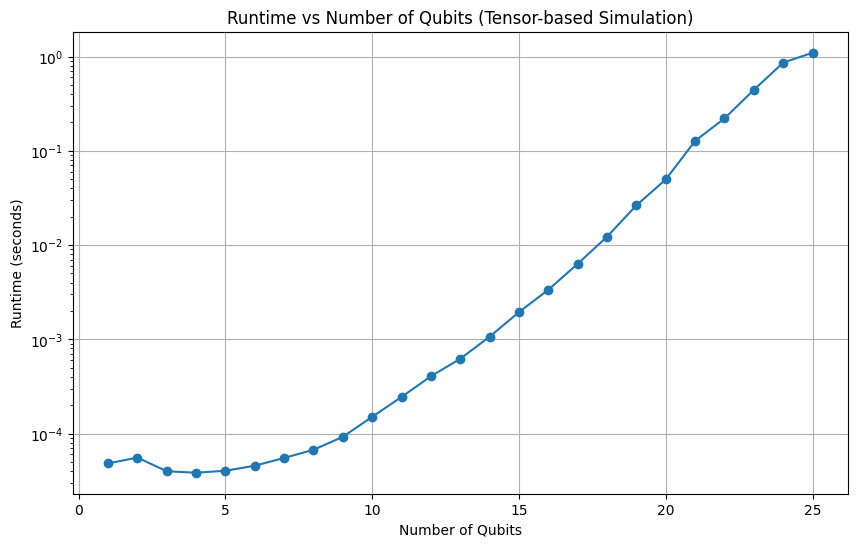

Maximum number of qubits simulated: 25
Runtime for 25 qubits: 1.0992 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]]).reshape(2, 2, 2, 2)

def apply_single_qubit_gate(state, gate, target):
    n_qubits = state.ndim
    indices = [*range(n_qubits)]
    indices[target] = n_qubits
    return np.einsum(gate, [n_qubits, target], state, indices, indices)

def apply_two_qubit_gate(state, gate, control, target):
    n_qubits = state.ndim
    indices = [*range(n_qubits)]
    indices[control] = n_qubits
    indices[target] = n_qubits + 1
    return np.einsum(gate, [n_qubits, n_qubits+1, control, target], state, indices, indices)

def run_circuit(n_qubits):
    state = np.zeros((2,) * n_qubits)
    state[(0,) * n_qubits] = 1

    state = apply_single_qubit_gate(state, H, 0)

    if n_qubits >= 2:
        state = apply_two_qubit_gate(state, CNOT, 0, 1)

    if n_qubits > 2:
        state = apply_single_qubit_gate(state, X, 2)

    return state

def measure_runtime(max_qubits):
    qubits = range(1, max_qubits + 1)
    runtimes = []

    for n in qubits:
        start_time = time()
        run_circuit(n)
        end_time = time()
        runtimes.append(end_time - start_time)

    return qubits, runtimes

max_qubits = 25
qubits, runtimes = measure_runtime(max_qubits)

plt.figure(figsize=(10, 6))
plt.plot(qubits, runtimes, marker='o')
plt.title('Runtime vs Number of Qubits (Tensor-based Simulation)')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.yscale('log')
plt.grid(True)
plt.show()

print(f"Maximum number of qubits simulated: {max_qubits}")
print(f"Runtime for {max_qubits} qubits: {runtimes[-1]:.4f} seconds")

#### Bonus question

1. How would you sample from the final states in the state vectorstatevector or tensor representations?

A state vector represents a quantum state, where each element is a complex amplitude for a specific basis state

To sample from the state vector, we use the absolute square of the amplitudes as probabilities

Tensor representation is a reshapes state vector typically reshaped into a higher dimensional array



2. And how about computing exact expectation values in the form <Ψ| Op |Ψ>?

To compute exact expectation values in the form \( ⟨ Ψ | Op | Ψ ⟩\), where \( Ψ \) is the quantum state and \( Op \) is the operator, we follow these steps.

The expectation value is given by:

\[
⟨ Ψ | Op | Ψ ⟩ = Ψ^† ⋅ (Op ⋅ Ψ)
\]

Where:
- \( Ψ^† \) is the conjugate transpose (Hermitian conjugate) of the state vector \( Ψ \).
- \( Op ⋅ Ψ \) represents the action of the operator on the state.

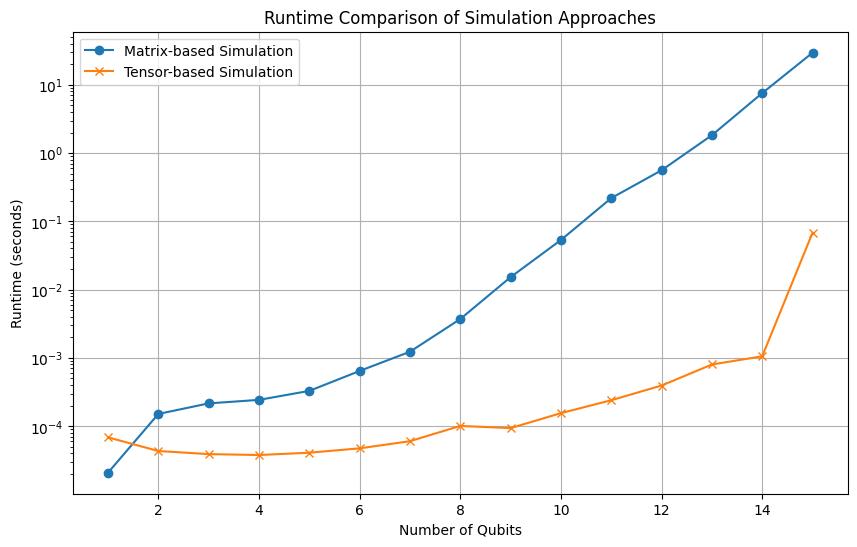

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def create_CNOT(control, target, n_qubits):
    if control >= n_qubits or target >= n_qubits:
        raise ValueError("Control and target qubits must be less than the total number of qubits")
    if control == target:
        raise ValueError("Control and target qubits must be different")

    mat = np.eye(2**n_qubits)
    for i in range(2**n_qubits):
        if (i & (1 << control)) != 0:
            mat[i, i ^ (1 << target)] = 1
            mat[i, i] = 0
    return mat

def apply_gate(state, gate, target_qubits, n_qubits):
    if isinstance(gate, np.ndarray) and gate.shape == (2**n_qubits, 2**n_qubits):
        return np.dot(gate, state)
    else:
        full_gate = 1
        for i in range(n_qubits):
            if i in target_qubits:
                full_gate = np.kron(full_gate, gate)
            else:
                full_gate = np.kron(full_gate, I)
        return np.dot(full_gate, state)

def run_circuit_matrix(n_qubits):
    state = np.zeros(2**n_qubits)
    state[0] = 1

    state = apply_gate(state, H, [0], n_qubits)

    if n_qubits >= 2:
        cnot = create_CNOT(0, 1, n_qubits)
        state = apply_gate(state, cnot, None, n_qubits)

    if n_qubits > 2:
        state = apply_gate(state, X, [2], n_qubits)

    return state

def measure_runtime_matrix(max_qubits):
    qubits = range(1, max_qubits + 1)
    runtimes = []

    for n in qubits:
        start_time = time()
        run_circuit_matrix(n)
        end_time = time()
        runtimes.append(end_time - start_time)

    return qubits, runtimes

I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]]).reshape(2, 2, 2, 2)

def apply_single_qubit_gate(state, gate, target):
    n_qubits = state.ndim
    indices = [*range(n_qubits)]
    indices[target] = n_qubits
    return np.einsum(gate, [n_qubits, target], state, indices, indices)

def apply_two_qubit_gate(state, gate, control, target):
    n_qubits = state.ndim
    indices = [*range(n_qubits)]
    indices[control] = n_qubits
    indices[target] = n_qubits + 1
    return np.einsum(gate, [n_qubits, n_qubits+1, control, target], state, indices, indices)

def run_circuit_tensor(n_qubits):
    state = np.zeros((2,) * n_qubits)
    state[(0,) * n_qubits] = 1

    state = apply_single_qubit_gate(state, H, 0)

    if n_qubits >= 2:
        state = apply_two_qubit_gate(state, CNOT, 0, 1)

    if n_qubits > 2:
        state = apply_single_qubit_gate(state, X, 2)

    return state

def measure_runtime_tensor(max_qubits):
    qubits = range(1, max_qubits + 1)
    runtimes = []

    for n in qubits:
        start_time = time()
        run_circuit_tensor(n)
        end_time = time()
        runtimes.append(end_time - start_time)

    return qubits, runtimes

max_qubits = 15
qubits_matrix, runtimes_matrix = measure_runtime_matrix(max_qubits)
qubits_tensor, runtimes_tensor = measure_runtime_tensor(max_qubits)

plt.figure(figsize=(10, 6))
plt.plot(qubits_matrix, runtimes_matrix, marker='o', label='Matrix-based Simulation')
plt.plot(qubits_tensor, runtimes_tensor, marker='x', label='Tensor-based Simulation')
plt.title('Runtime Comparison of Simulation Approaches')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import numpy as np

def sample_from_statevector(statevector, num_samples=1000):
    probabilities = np.abs(statevector)**2
    n_qubits = int(np.log2(len(statevector)))
    possible_states = np.arange(2**n_qubits)
    samples = np.random.choice(possible_states, size=num_samples, p=probabilities)
    return samples

def sample_from_tensor(tensor_state, num_samples=1000):
    probabilities = np.abs(tensor_state.flatten())**2
    n_qubits = tensor_state.ndim
    flat_samples = np.random.choice(2**n_qubits, size=num_samples, p=probabilities)

    samples = np.unpackbits(flat_samples.astype(np.uint8).reshape(-1, 1),
                            axis=1, bitorder='little')[:, :n_qubits]
    return samples

def compute_expectation_value(state, operator):
    if state.ndim == 1:
        return np.vdot(state, np.dot(operator, state))
    else:
        state_flat = state.flatten()
        return np.vdot(state_flat, np.dot(operator, state_flat))

if __name__ == "__main__":
    n_qubits = 10
    state_vector = np.random.rand(2**n_qubits) + 1j * np.random.rand(2**n_qubits)
    state_vector /= np.linalg.norm(state_vector)

    samples_sv = sample_from_statevector(state_vector, num_samples=10)
    print("Samples from statevector:", samples_sv)

    tensor_state = state_vector.reshape((2,) * n_qubits)

    samples_tensor = sample_from_tensor(tensor_state, num_samples=10)
    print("Samples from tensor state:", samples_tensor)

    identity = np.eye(2**n_qubits)
    exp_value = compute_expectation_value(state_vector, identity)
    print("Expectation value:", exp_value)

Samples from statevector: [331 238  63 549 846 145 951 798 177 725]
Samples from tensor state: [[0 1 0 0 1 0 1 1]
 [0 0 0 1 0 0 1 1]
 [1 0 1 1 0 1 0 0]
 [0 1 0 0 1 1 1 1]
 [0 0 1 0 0 1 1 0]
 [0 0 1 1 0 1 1 1]
 [1 1 1 1 1 0 0 0]
 [0 0 1 0 0 0 0 1]
 [1 0 0 0 1 0 1 0]
 [0 0 0 1 1 0 1 1]]
Expectation value: (1.0000000000000004+0j)
